# INTERNSHIP TASK 1

**Data set :**

*For training:*
500 horse images 
527 human images
*For validation:*
128 horse images
128 human images

## Problem Statement

Classify Horse or Human in a given Image

##Applied Solution
I am going to use Deep Learning CNN algorithm

### Import Libararies

In [37]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization


In [2]:
keras.__version__

'2.4.3'

### Load Dataset

In [4]:
train_data_path = "/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/train"

validation_data_path="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/validation"

### Data Preprocessing

I will be generating more Data with keras for better training of CNN

### *Data Augmentation*

In [5]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")

In [6]:
training_data =train_datagen.flow_from_directory(train_data_path , 
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode="binary")

Found 1027 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [8]:
valid_datagen= ImageDataGenerator(rescale=1./255)
validation_data =valid_datagen.flow_from_directory(validation_data_path , 
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode="binary")

Found 256 images belonging to 2 classes.


**Function to see images**

In [12]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes= axes.flatten()
  for img , ax in zip(images_arr , axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

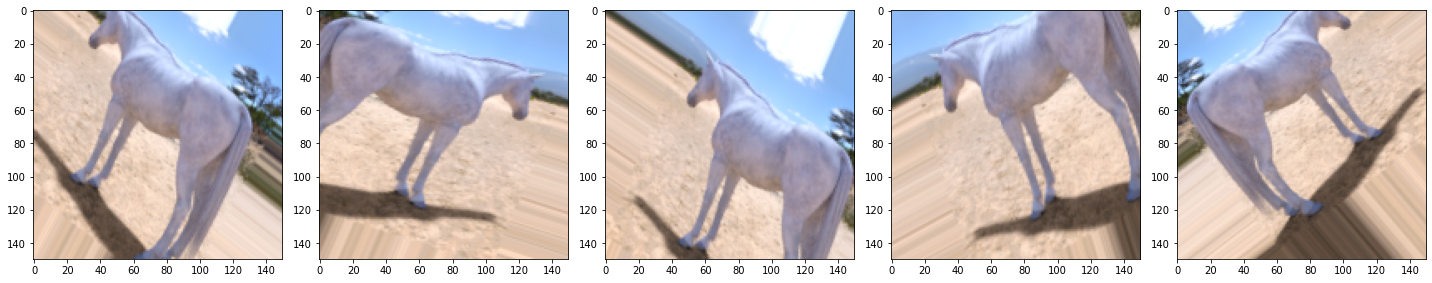

In [13]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

**Building the CNN Model**

In [42]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32,kernel_size=7,input_shape=[150,150,3]),
                                     BatchNormalization(),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                     keras.layers.Conv2D(filters=62,kernel_size=5,),
                                     BatchNormalization(),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                     keras.layers.Conv2D(filters=128,kernel_size=3,),
                                     BatchNormalization(),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     
                                     keras.layers.Conv2D(filters=256,kernel_size=3,),
                                     BatchNormalization(),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5), #to avoid overfitting frop 50% neurons
                                     keras.layers.Flatten() ,#NN building
                                     keras.layers.Dense(units=128,activation='relu'), #input layer
                                     BatchNormalization(),

                                     keras.layers.Dropout(0.25), #to avoid overfitting frop 50% neurons
                                     keras.layers.Dense(units=256,activation='relu'), 

                                     BatchNormalization(),
                                     keras.layers.Dropout(0.15),
                                     keras.layers.Dense(units=2,activation='softmax') #output layer
])

**compiling the model**

In [43]:
cnn_model.compile(optimizer=Adam(lr=0.0001) , loss="sparse_categorical_crossentropy",metrics=['accuracy'])

**Save the best model**

In [44]:
model_path = '/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/predictor.h5'
checkpoint = ModelCheckpoint(model_path , monitor="val_accuracy", verbose=1,save_best_only=True,mode='max')
callbacks_lists = [checkpoint] 

**Training The Model**


In [45]:
model_history = cnn_model.fit(training_data,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_data,
                              callbacks=callbacks_lists)

Epoch 1/100
33/33 [==============================] - 14s 398ms/step - loss: 0.9680 - accuracy: 0.5804 - val_loss: 0.8293 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/predictor.h5
Epoch 2/100
33/33 [==============================] - 13s 396ms/step - loss: 0.6045 - accuracy: 0.7185 - val_loss: 1.0816 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/100
33/33 [==============================] - 13s 393ms/step - loss: 0.5100 - accuracy: 0.7723 - val_loss: 1.1331 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/100
33/33 [==============================] - 13s 387ms/step - loss: 0.4797 - accuracy: 0.7844 - val_loss: 1.4764 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/100
33/33 [==============================] - 13s 395ms/step - loss: 0.4880 - accuracy: 0.7879

**Summary**

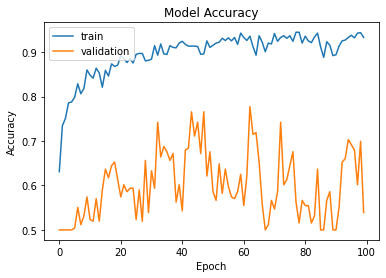

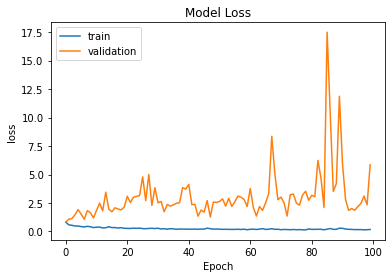

In [46]:
#Accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train","validation"] , loc="upper left")
plt.show()

#Loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train","validation"] , loc="upper left")
plt.show()




# Prediction



In [83]:
model_path = "/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/predictor.h5"

model = keras.models.load_model(model_path)

#horse image path

horse2="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/test/horse2.jfif"
horse4="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/test/horse4.jfif"
#human image path
human1="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/test/human1.jfif"
human3="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/test/human3.jfif"
human4="/content/drive/MyDrive/Crisp-Metric-Internship-May21/horse-or-human/test/human4.jfif"


Data preprocessing

In [84]:
import numpy as np
from keras.preprocessing import  image

def pred_human_horse(model , horse_or_human):
  test_image = image.load_img(horse_or_human , target_size=(150,150)) #resize
  test_image = image.img_to_array(test_image)/255 #numpy array  between 0-1
  test_image = np.expand_dims(test_image,axis=0) #4 dimension

  result= model.predict(test_image).round(3) #rounding off
  pred =np.argmax(result)
  print(result, "--->>",pred)

  if pred==0:
    print("Its a Horse")

  else:
    print("Its a Human")

In [86]:
for horse_or_human in [horse2,horse4 , human1,human3,human4]:
  pred_human_horse(model, horse_or_human)

[[0.902 0.098]] --->> 0
Its a Horse
[[0.99 0.01]] --->> 0
Its a Horse
[[0. 1.]] --->> 1
Its a Human
[[0.002 0.998]] --->> 1
Its a Human
[[0. 1.]] --->> 1
Its a Human
